### Multi-Output Text Classification

+ Binary Classification: target has either 0 or 1
+ Multi-Class: A classification problem consisting of more than two classes. 
+ Multi-Label: A target can have more than two labels at the same time
+ Multi-output: A target where each sample has multiple classification/regression labels
    - Multiclass-multioutput classification (also known as multitask classification) is a classification task which labels each sample with a set of non-binary properties. 
    - Both the number of properties and the number of classes per property is greater than 2.
    

### Libraries
+ Scikit-Learn
    - sklearn.multioutput
+ Scikit-Multi-Learn
+ Tensorflow
+ Pytorch
+ etc


![](MultiOutputvsMulti-Label-JCharisTech.png)

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# Others
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix


In [8]:
# Load Dataset
df = pd.read_csv("data/netflix_titles_dataset.csv")

In [9]:
df.head()

,Unnamed: 0,title,description,type,rating
0,0,3%,In a future where the elite inhabit an island ...,TV Show,TV-MA
1,1,7:19,After a devastating earthquake hits Mexico Cit...,Movie,TV-MA
2,2,23:59,"When an army recruit is found dead, his fellow...",Movie,R
3,3,9,"In a postapocalyptic world, rag-doll robots hi...",Movie,PG-13
4,4,21,A brilliant group of students become card-coun...,Movie,PG-13


In [10]:
# Class 1/Target 1/Output 1 Distribution
df['type'].value_counts()

Movie      4788
TV Show    2143
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

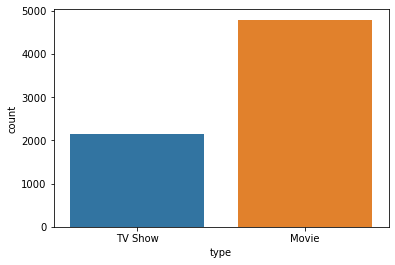

In [11]:
sns.countplot(x='type',data=df)

In [12]:
# Class 2/Target 2/Output 2 Distribution
df['rating'].value_counts()

TV-MA    2863
TV-14    1931
TV-PG     806
R         665
PG-13     386
TV-Y      280
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

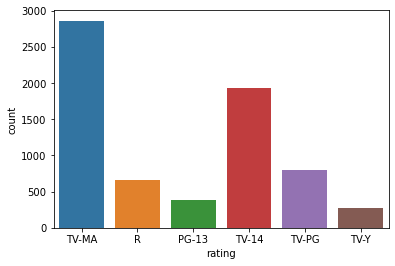

In [13]:
sns.countplot(x='rating',data=df)

In [14]:
# Load Pkgs
from sklearn.multioutput import MultiOutputClassifier

In [16]:
# Text Cleaning
import neattext.functions as nfx

In [19]:
df['title'] = df['title'].str.lower()

In [20]:
df.head()

,Unnamed: 0,title,description,type,rating
0,0,3%,In a future where the elite inhabit an island ...,TV Show,TV-MA
1,1,7:19,After a devastating earthquake hits Mexico Cit...,Movie,TV-MA
2,2,23:59,"When an army recruit is found dead, his fellow...",Movie,R
3,3,9,"In a postapocalyptic world, rag-doll robots hi...",Movie,PG-13
4,4,21,A brilliant group of students become card-coun...,Movie,PG-13


In [23]:
# Features & Labels
Xfeatures = df['title']
ylabels = df[['type','rating']]

In [24]:
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=7)

### Build A Pipeline for our Model

In [25]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),
                          ('lr_multi',MultiOutputClassifier(LogisticRegression()))])

In [26]:
# Fit on Dataset
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression()))])

In [27]:
# Accuracy Score
pipe_lr.score(x_test,y_test)

0.2639423076923077

In [30]:
# Sample Prediction
print(x_test.iloc[0])
print("Actual Prediction:",y_test.iloc[0])

the midnight sky
Actual Prediction: type      Movie
rating    PG-13
Name: 5917, dtype: object


In [31]:
ex1 = x_test.iloc[0]

In [32]:
ex1

'the midnight sky'

In [33]:
pipe_lr.predict([ex1])

array([['Movie', 'TV-MA']], dtype=object)

In [35]:
# Prediction Prob
print(pipe_lr.classes_)
pipe_lr.predict_proba([ex1])

[array(['Movie', 'TV Show'], dtype=object), array(['PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG', 'TV-Y'], dtype=object)]


[array([[0.74445483, 0.25554517]]),
 array([[0.12310188, 0.07038494, 0.21476461, 0.46916205, 0.10270243,
         0.01988409]])]

#### Using ML Estimators that support multi-output
+ KNN
+ RF
+ DT

In [36]:
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('knn',KNeighborsClassifier(n_neighbors=4))])

In [37]:
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [38]:
pipe_knn.predict([ex1])

array([['Movie', 'TV-MA']], dtype=object)

#### Narrative
+ Difficult to compute accuracy using .score()

In [39]:
#### Thanks For Watching
#### Jesus Saves @JCharisTech
#### Jesse E.Agbe(JCharis)